In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0,1,size =(200,2))
y = np.array(X[:,0] **2 + X[:,1]  < 1.5 , dtype = 'int' )
for _ in range(20):
    y[np.random.randint(200)]  = 1

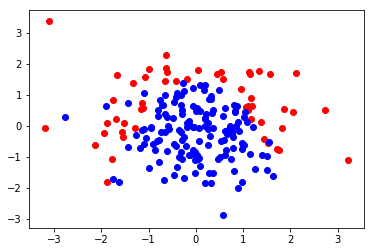

In [4]:
plt.scatter(X[y ==0,0],X[y==0,1],color='r')
plt.scatter(X[y ==1,0],X[y==1,1],color='b')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 666)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
log_reg = LogisticRegression()

In [9]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
log_reg.score(X_train,y_train)

0.7933333333333333

In [11]:
log_reg.score(X_test,y_test)

0.86

In [12]:
def plot_decision_boundary(model,axis):
    #绘制不规则决策边界的方法
    x0,x1 = np.meshgrid(
            np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
            np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


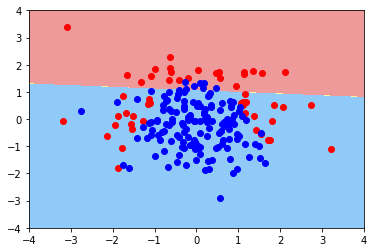

In [15]:
plot_decision_boundary(log_reg,axis=(-4,4,-4,4))
plt.scatter(X[y ==0,0],X[y==0,1],color='r')
plt.scatter(X[y ==1,0],X[y==1,1],color='b')
plt.show()

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('ploy',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression())
    ])

In [17]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('ploy', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


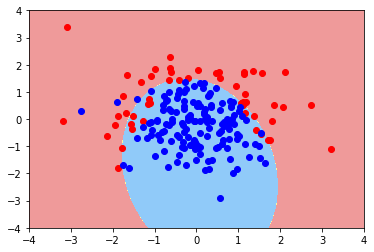

In [18]:
plot_decision_boundary(poly_log_reg,axis=(-4,4,-4,4))
plt.scatter(X[y ==0,0],X[y==0,1],color='r')
plt.scatter(X[y ==1,0],X[y==1,1],color='b')
plt.show()

In [19]:
poly_log_reg.score(X_train,y_train)

0.9133333333333333

In [20]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('ploy', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [24]:
def PolynomialLogisticRegression(degree,C): #传入的C为分类准确度前面的系数
    return Pipeline([
        ('ploy',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression(C = C))
    ])

In [25]:
poly_log_reg3 = PolynomialLogisticRegression(degree=20,C=0.1) #degree=20,C =0.1说明让模型正则化的项起更大的作用，分类准确度函数作用小一些
poly_log_reg3.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('ploy', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [26]:
poly_log_reg3.score(X_train,y_train)

0.8533333333333334

In [28]:
poly_log_reg3.score(X_test,y_test)

0.92

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


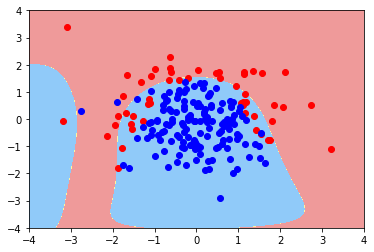

In [29]:
plot_decision_boundary(poly_log_reg3,axis=(-4,4,-4,4))
plt.scatter(X[y ==0,0],X[y==0,1],color='r')
plt.scatter(X[y ==1,0],X[y==1,1],color='b')
plt.show()

In [35]:
def PolynomialLogisticRegression(degree,C,penalty='l2'): #传入的C为分类准确度前面的系数
    return Pipeline([
        ('ploy',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression(C = C ,penalty=penalty))
    ])

In [36]:
poly_log_reg4 = PolynomialLogisticRegression(degree=20,C=0.1,penalty='l1') #degree=20,C =0.1说明让模型正则化的项起更大的作用，分类准确度函数作用小一些
poly_log_reg4.fit(X_train,y_train) 

Pipeline(memory=None,
     steps=[('ploy', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [37]:
poly_log_reg4.score(X_train,y_train)

0.8266666666666667

In [38]:
poly_log_reg4.score(X_test,y_test)

0.9

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


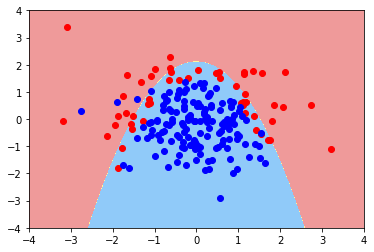

In [39]:
plot_decision_boundary(poly_log_reg4,axis=(-4,4,-4,4))
plt.scatter(X[y ==0,0],X[y==0,1],color='r')
plt.scatter(X[y ==1,0],X[y==1,1],color='b')
plt.show()